# <center> **Лекция 3:** Компьютерное зрение. Цифровая обработка изображений. Сегментация и детекция. </center>
----
<br>
</br>

<center> <img src=./../src/imgs/segmentation_detection.png> </center>

<br>
</br>

## __План на сегодня:__

----
### - _Задача сегментации изображения._
### - _Задача детекции объектов на изображении/видео._
### - _Трекинг объектов на видео._
----


# Часть 1: Задача сегментации изображения:
----

#### Примеры сегментации изображения:

----
### 1. Удаление фона на изображении, выделение главного объекта:
----

![](./../src/imgs/backscene_deletion.png)

<br>
</br>

----
### 2. Сегментация медицинских изображений:
----

![](./../src/imgs/medical_segmentation.png)

<br>
</br>

----
### 3. Детекция части объекта на изображении (например лица) для автофокусировки камеры:
----

![](./../src/imgs/autofocus.png)

<br>
</br>

----
### 4. Детекция и распознование объектов для оценки дорожной ситуации:
----

![](./../src/imgs/road_detection.png)

<br>
</br>

----
### 5. [Управление устройством с помощью жестов:](https://www.youtube.com/watch?v=mLT4CFLIi8A)
----

![](./../src/imgs/gesture.png)

<br>
</br>


## Задача сегментации. Основные подходы:
----

#### 1. [Сегментация по порогу - Thresholding.](https://datacarpentry.org/image-processing/07-thresholding/#:~:text=Thresholding%20is%20a%20type%20of,is%20simply%20black%20and%20white.)
#### 2. [Выделение контура объекта - Countour Detection](https://learnopencv.com/contour-detection-using-opencv-python-c/)
#### 3. [Водораздел - Watershed Segmentation](https://www.sciencedirect.com/topics/computer-science/watershed-segmentation)
#### 4. [Супер-пиксель](https://openaccess.thecvf.com/content_CVPR_2020/papers/Yang_Superpixel_Segmentation_With_Fully_Convolutional_Networks_CVPR_2020_paper.pdf)
#### 5. [Алгоритмы на графах](http://people.cs.uchicago.edu/~pff/papers/seg-ijcv.pdf)

# Сегментация по порогу - Thresholding
----

![](./../src/imgs/thresholding.png)

<br>
</br>


В чем суть __пороговых методов__ (да, их свыше 25-ти разных алгоритмов) - это один из методов сегментации изображения, который основан на разделении изображения на 2 и более частей, разделение основывается на некоторых пороговых значениях цветовой схемы (цветовых гистограмм), либо полученных каким-либо путем иных признаков изображения. Несмотря на всю вариативность методов, всего 2 основных подхода к сегментации по порогу:

1. Метод с глобальным порогом.
2. Метод с адаптивным порогом.

Всё остальное - это вариативность и производные этих 2-х основных методов сегментации по порогу.


Основная концепция (идея) - существуют некоторые признаки изображения, например цветовая гистограмма. На гистаграммах можно выделить соответствующие группы изображений с характерными распределениями. Все пиксели будут сгруппированны вокруг нескольких основных центров гистограммы. Для выделения этих областей достаточно подобрать некоторое пороговое значение $T_i$ и при помощи него определить все точки, имеющие $f(x,y) \le T$ , как принадлежащие объекту, а в противном случуае - принадлежащие фону изображения.

Результат полученой операции можно выразить при помощи следующей системы:

#### $g(x, y) = \begin{cases} 1, & \mbox{ если } \mbox{f(x, y) > T} \\ 0, & \mbox{ если } \mbox{f(x,y) \le T} \end{cases}$


Если значение $T$ одинаково для всех точек изображения, то такой порог называют __глобальным__. Если значение $T$ зависит от пространственных координат $x$ и $у$ , то такой порог называт __динамическим__ (в случае например при работе с маской). Если $T$ зависит от значений $f(x,y)$ (окрестности пикселя (пикселей)) - то такой порог называют __адаптивным__.


----
#### Сегментация по порогу OpenCV:
----


```
cv2.threshold(src, thresh, maxval, type)

    src: исходное изображение
    thresh: пороговое значение для операции сегментации
    maxval: значение записывается (указывается) в случае если интенсивность пикселя выше порога
    type: cv2.THRESH_BINARY или cv2.THRESH_TRUNC либо cv2.THRESH_TOZERO
```


Плюсы и минусы:
1. Прост и наивен в реализации.
2. Неустойчив к различного рода шумам.
3. Неустойчив к изменению освещенности различных частей изображения.

#### От части минусов, которые присущи простому методу сегментации по порогу можно попробовать решить при помощи адаптивного порога:

1. Для каждого пикселя (или окрестности) вычисляется усредненное значение интенсивности.
2. В качестве значения порога можно использовать либо само среднее значение либо среднее значение с гауссовским ядром.

----
Сегментация с адаптивным порогом в OpenCV:
----

```
cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C)

    src: исходное изображение
    maxValue: значение пикселей для которых интенсивность выше порога
    adaptiveMethod: метод оценки порога - cv2.ADAPTIVE_THRESH_MEAN_C, cv2.ADAPTIVE_THRESH_GAUSSIAN_C
    thresholdType: тип порога cv2.THRESH_BINARY или cv2.THRESH_BINARY_INV
    blockSize: размер блока для вычисления порога (ядра), задается скаляром - 3, 4, 5, 6, 7 и т.д.
    C: константа, псевдо регуляризатор, вычитается из оценки значения порога
```

Плюсы и минусы:
1. Устойчив к локальным изменениям на изображении.
2. Требует больше вычислительных ресурсов по сравнению с простым порогом (бинарным).

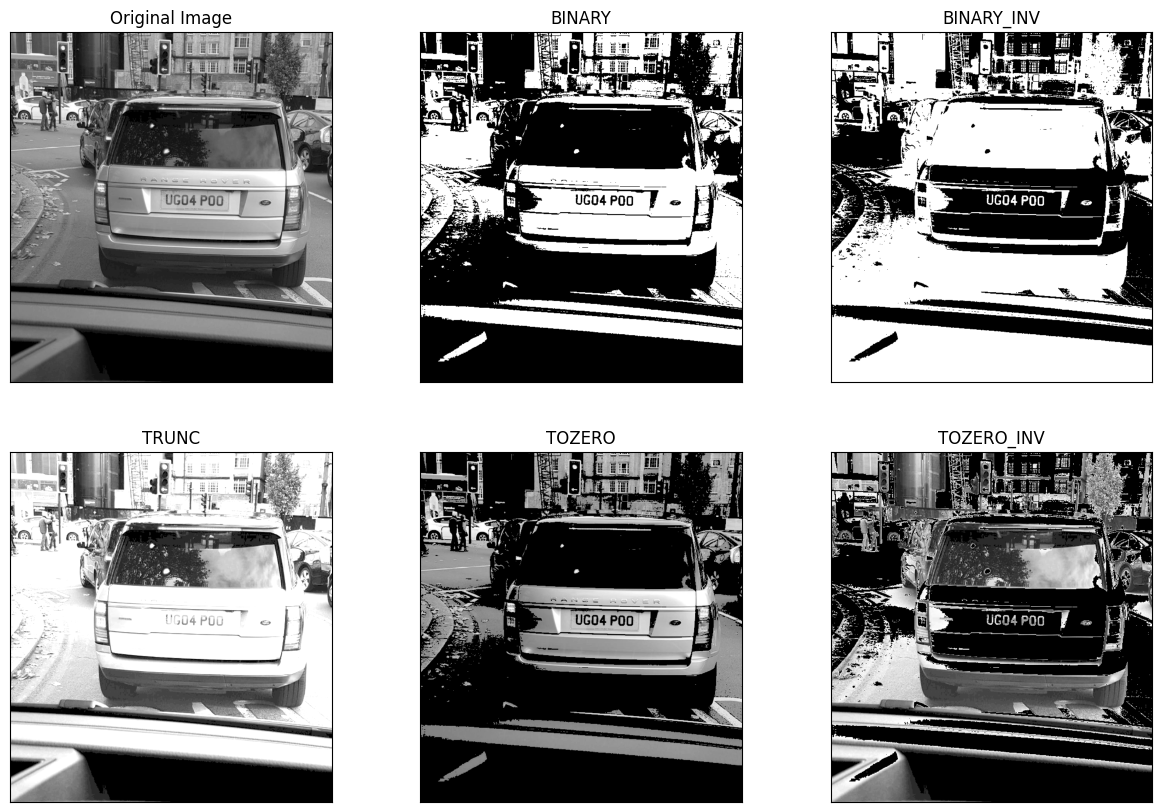

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Загрузим тестовое изображение:
img = cv2.imread('./../data/car_numbers/005.png',0)

# Применим различные вариации пороговых методов:
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)


titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]


plt.figure(figsize=(15,10))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

In [3]:
# Адаптивные вариант:

img = cv2.imread('./../data/car_numbers/005.png',0)
img = cv2.medianBlur(img,5)

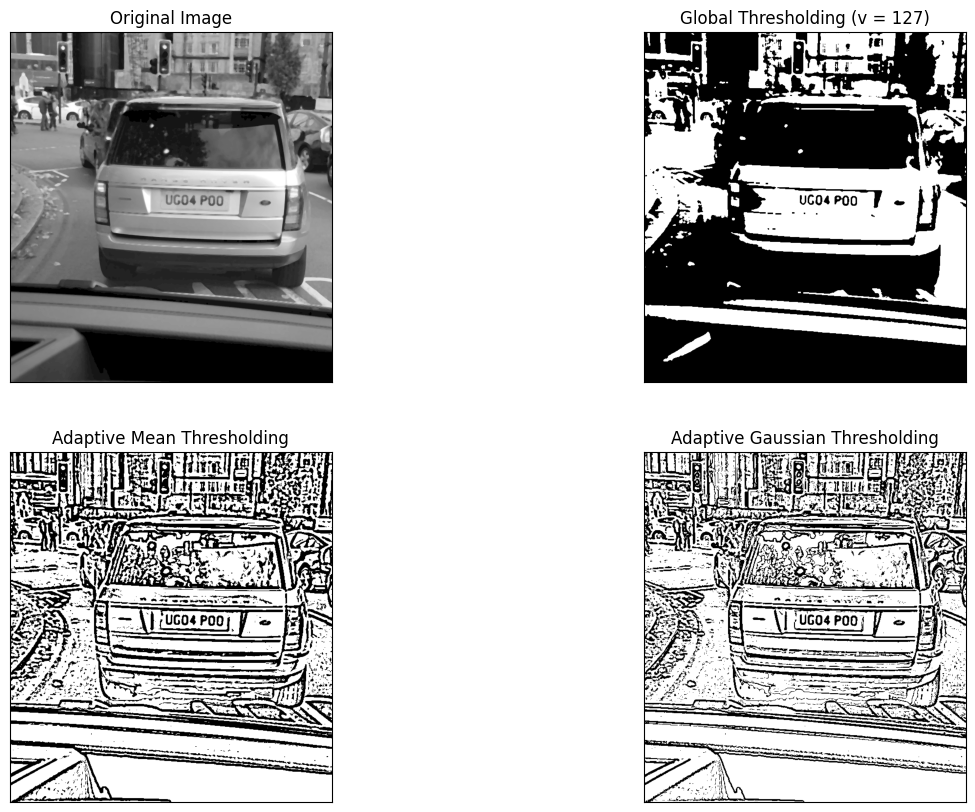

In [4]:
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]



plt.figure(figsize=(15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()


# Выделение контура объекта - Contour Detection
----

<br>
</br>

![](./../src/imgs/countour_detection.png)

<br>
</br>


__Суть задачи:__
- Найти границы объекта на изображении
- Добавить информацию об объекте изоборажения
- Использовать полученную информацию для детекция и распознования объектов либо для кластеризации

Важно учесть особенность задачи - она выполняется только на бинаризированном изображении, ибо это таже самая задача кластеризации, для которой необходимо учесть структуру объекта для правильного решения. Обычно испольуется оператор Собеля.

__Шаги:__
1. Для поиска контура необходимо бинаризовать исходное изображение (либо вручную либо используя различные градиентные операторы).
2. Для получения информации о форме объекта необходимо полученные контуры аппроксимировать полигоном.


__Реализация в OpenCV__:

```
cv2.findContours(image, mode, method[, contours[, hierarchy[, offset]]]) → contours, hierarchy
    image: бинаризованное изображение
    mode: определяет какие контуры необходимо найти (cv2.CV_RETR_EXTERNAL, cv2.CV_RETR_TREE)
    method: метод поиска и фильтрации точек контура
    contours: массив контуров, каждый контур - это массив точек
    hierarchy: задает иерархию вложенности контуров
    offset: задает сдвиг точек контура
```

Плюсы и минусы:
1. Метод требует предобработки (бинаризации изображения).
2. Время работы зависит от сложности и разрешения исходного изображения.
3. Позволяет получить дополнительную информацию о форме сегмента.

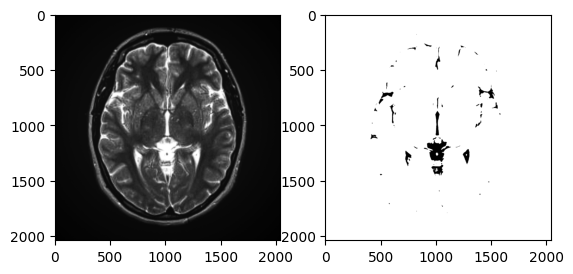

In [5]:
import cv2
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

# keep in mind that open CV loads images as BGR not RGB
image = cv2.imread("./../data/brain.jpg")
# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# create a binary thresholded image
_, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)

# contours from the thresholded image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# draw all contours
image = cv2.drawContours(image, contours, -1, (255, 0, 0), 4)

plt.subplot(121)
plt.imshow(np.asarray(gray), cmap=plt.get_cmap('gray'))
plt.subplot(122)
plt.imshow(np.asarray(binary), cmap="gray")
plt.show()

# Водораздел - Watershed Segmentation
----

Водораздел (Watershed) или Методы водоразделов - класс алгоритмов наращивания областей, рекурсивно выполняющих процедуру группировки пикселей в подобласти по заранее заданным критериям. Данный метод основан на 3-х концепциях обработки изображения:
1. Обнаружение и устранение разрывов.
2. Пороговая обработка изображения.
3. Обработка областей изображения.

Метод водоразделов позволяет получать более стабильные результаты сегментации изображения. Само понятие водораздела основано на представлении изображения как трехмерной поверхности, где в качестве высоты используется яркость пикселя (аналогия с HSV кодировкой). В этом случае на поверхности реализуется поиск 3-х типов точек:
1. Точки локального минимума.
2. Точки находящиеся на склоне, с которых градиент сливается к центру.
3. Точки находящиеся на гребне возвышенности.

Линии образованные точками-гребнями, представляют с собой линии водоразделов, поэтому суть алгоритма - поиск таких линий.

Алгоритм:
1. В местах локального минимума образуем «дырки», через которые вода начнет заполнять трехмерную поверхность.
2. Если вода с двух сторон гребня готова объединиться в один бассейн, устанавливаем перегородку.
3. Когда над водой останутся только загородки, останавливаем алгоритм.


Итого суть:
- изображение представляется в виде рельефа
- точки с высокой интенсивностью — возвышенности
- точки с низкой интенсивностью — низины
- помимо интенсивности, используют фактор расстояния пикселя до грани.

![](./../src/imgs/watersheed_schema.png)

<br>
</br>


[Аниманиция работы алгоритма:](https://www.youtube.com/watch?v=RrJMEKohwrs)

− начинаем заполнять низины;
− там где сталкиваются области из разных бассейнов проходит граница объекта;
− заполняем до тех пор, пока все вершин не скроются под водой.


Плюсы и минусы:
1. Из-за шума и не идеальной структуры сегменты могут объединяться в один.
2. Необходимо указать начальное приближение (маркеры) для сегментации.


##### Рассмотрим похожий пример из библиотеки OpenCV:

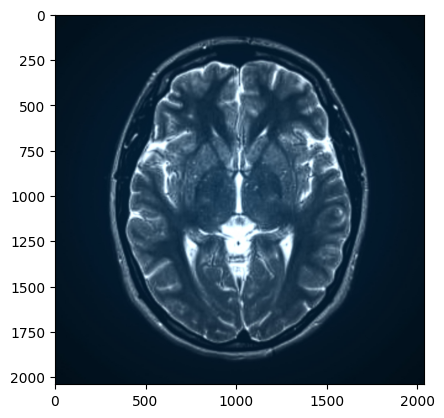

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./../data/brain.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

##### Сегментируем по порогу

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU) # Алогоритм подбора порогов OTSU который учитывает окрестности

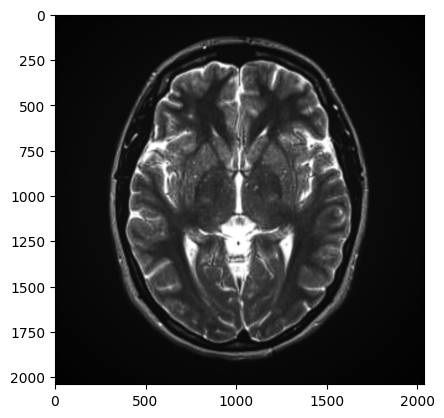

In [8]:
plt.imshow(gray, cmap='gray')

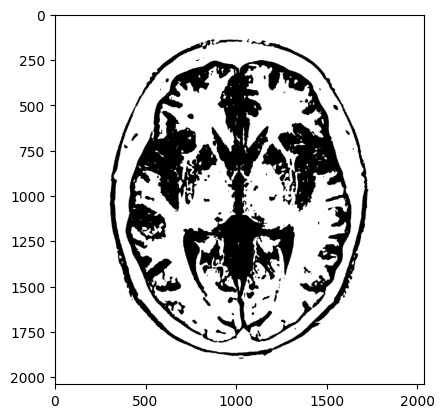

In [9]:
plt.imshow(thresh, cmap='gray')

##### Применяем операцию dilate

In [10]:
kernel = np.ones((3,3),np.uint8)
sure_bg = cv2.dilate(thresh, kernel, iterations=3)

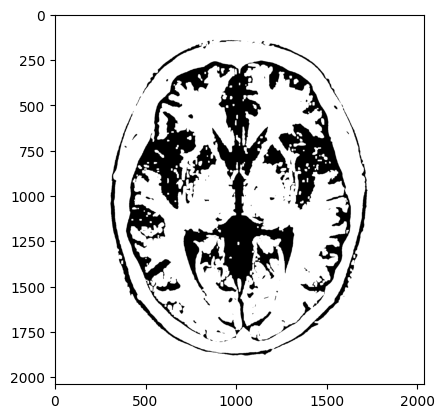

In [11]:
plt.imshow(sure_bg, cmap='gray')

##### Для каждого пикселя вычисляем расстояние до ближашей грани

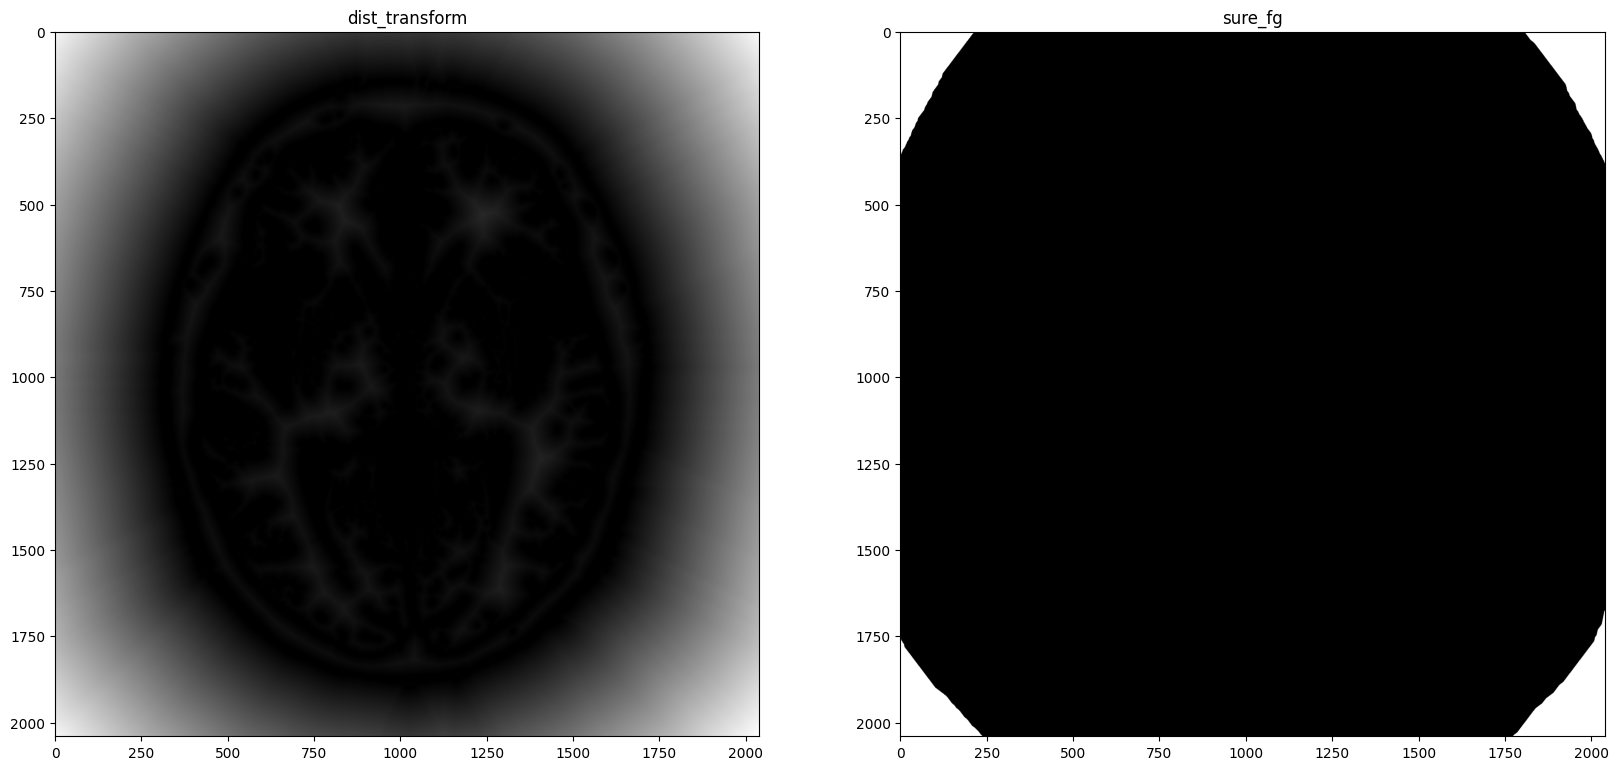

In [12]:
dist_transform = cv2.distanceTransform(thresh,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

fig = plt.figure(figsize=(20, 10))

subplot = fig.add_subplot(1, 2, 1)
plt.imshow(dist_transform, cmap='gray');
subplot.set_title('dist_transform');

subplot = fig.add_subplot(1, 2, 2)
plt.imshow(sure_fg, cmap='gray');
subplot.set_title('sure_fg');

##### Получаем маску областей неопределенности

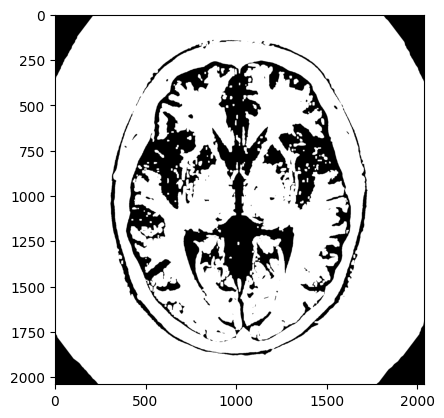

In [13]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
plt.imshow(unknown, cmap='gray')

##### Задаем маркеры начального приближения

In [14]:
# объединяем соседние пиксели в связные компоненты
# в результате для каждого пикселя известен номер связной компоненты
# для пикселей фона (с нулевой интенсивностью) номер компоненты равен 0
ret, markers = cv2.connectedComponents(sure_fg)
# инкрементируем значения компонент на единицу, у фона теперь кластер 1
markers = markers + 1
# неизвестную область обозначаем свободной
markers[unknown==255] = 0

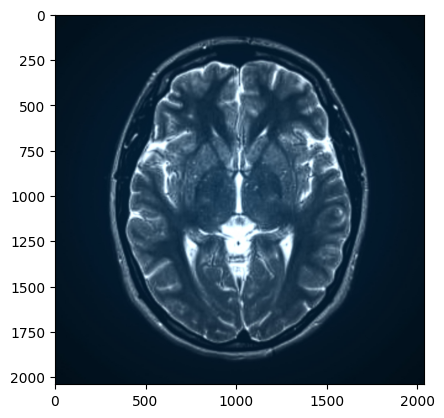

In [15]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

##### Применяем алгоритм водораздела для сегментации

In [16]:
markers = cv2.watershed(img, markers)
img[markers == -1] = [255,0,0]

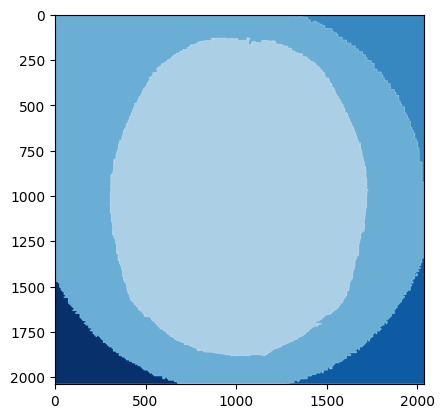

In [17]:
plt.imshow(markers, cmap=plt.cm.Blues)

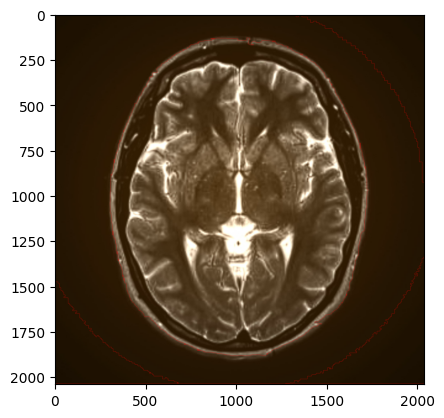

In [18]:
plt.imshow(img)

# Суперпиксель - Super-Pixel
----

<br>
</br>

![](./../src/imgs/super_pixel.png)

<br>
</br>


Идея:
* объединение нескольких соседних пикселей на изображении в единую область;
* объединение происходит по таким признакам как цвет или текстура;
* в результате объединения пикселей получается упрощенное представление изображения, которое можно использовать в задачах распознавания


SP реализует разбиение изображения на множество мелких фрагментов (суперпикселей), представляющих из себя относительно однородные группы расположенных рядом пикселей. Каждый суперпиксель потенциально является атомарным регионом (фрагментом) изображения, т. е. все входящие в него пиксели рассматриваются при дальнейшей обработке как единое целое. При этом суперпиксели не обязательно должны иметь правильную форму и, естественно, всегда имеется определенное число ошибок, допускаемых при стремлении разбить изображение на однородные фрагменты.


Cуперпиксельная карта изображения, полученная после проведения суперпиксельной сегментации, обладает рядом преимуществ:
1. Вычислительная эффективность: десятки и сотни тысяч пикселей заменяются всего лишь на десятки или сотни суперпикселей, которые выступают в алгоритмах как единое целое.
2. При суперпиксельном представлении изображения можно говорить о взаимосвязях между отдалёнными друг от друга пикселями, в то время как в пиксельном – только о связях между рядом лежащими пикселями.
3. Cуперпиксели имеют большее смысловое значение. Каждый суперпиксель является согласованной единицей, так как принадлежащие ему пиксели имеют схожие цвета, яркость и прочие свойства
4. В отличие от окна прямоугольной формы, суперпиксель с большей вероятностью принадлежит только одному объекту изображения, не затрагивая остальные



Основное требование к суперпиксельной сегментации состоит в следующем: пиксели внутри каждого суперпикселя должны быть максимально похожи, а пиксели, находящиеся в разных суперпикселях, должны в известной степени отличаться. Данная задача может решаться принципиально разными способами.

Большую категорию суперпиксельных алгоритмов можно разделить на 3 большие подгруппы:
1. __Разделяющие (дивизионные/дивизивные) суперпиксельные алгоритмы.__
   _В разделяющих алгоритмах всё изображение изначально считается одним большим суперпикселем, а затем осуществляется егорекурсивное разбиение на более мелкие компоненты. К разделяющим алгоритмам относится, например, первый из опубликованных алгоритмов суперпиксельной сегментации – алгоритм нормализованного разреза (Nсut)._
2. __Объединяющие (агломеративные) суперпиксельные алгоритмы.__
    _Объединяющие алгоритмы, напротив, принимают каждый пиксель изображения за отдельный суперпиксель, осуществляя в дальнейшем их жадное слияние. Примером объединяющего алгоритма является алгоритм ERS (Entropy Rate Superpixel)._
3. __Дискриминационные суперпиксельные алгоритмы.__
    _В дискриминационных алгоритмах осуществляется предварительное разбиение пикселей на кластеры с последующим итеративным уточнением_




# SEEDS: Superpixels Extracted via Energy-Driven Sampling

Для корректной работы примера необходимо установить пакет opencv-contrib:

`
pip install --upgrade opencv-python opencv-contrib-python
`

In [19]:
import cv2
import numpy as np
# pip install opencv-python opencv-contrib-python
from cv2 import ximgproc
from matplotlib import pyplot as plt

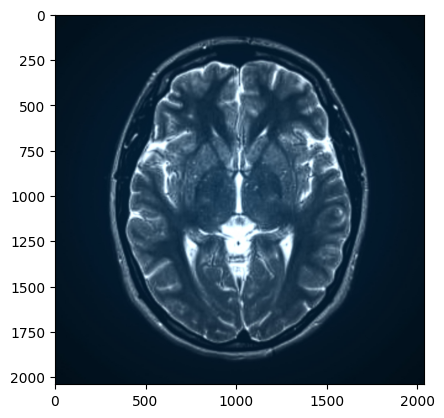

In [20]:
img = cv2.imread('./../data/brain.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [21]:
seeds = None
display_mode = 0
num_superpixels = 4
prior = 2
num_levels = 4
num_histogram_bins = 5
num_iterations = 1000

# преобразуем пространство цветов
converted_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

height,width,channels = converted_img.shape

# инициализируем алгоритм
seeds = ximgproc.createSuperpixelSEEDS(width, height, channels,
            num_superpixels, num_levels, prior, num_histogram_bins)

# выполняем num_iterations шагов
seeds.iterate(converted_img, num_iterations)

# получаем разметку пикселей
labels = seeds.getLabels()

# получаем маску контуров
mask = seeds.getLabelContourMask(thick_line=False)

# инвертируем маску
mask_inv = cv2.bitwise_not(mask)

# зануляем пикселы исходной картинки на границах
result_bg = cv2.bitwise_and(img, img, mask=mask_inv)

# создаем изображение контуров
color_img = np.zeros((height,width,3), np.uint8)
color_img[:] = (0, 255, 0)
result_fg = cv2.bitwise_and(color_img, color_img, mask=mask)

# совмещаем границы с исходным изображением
result = cv2.add(result_bg, result_fg)

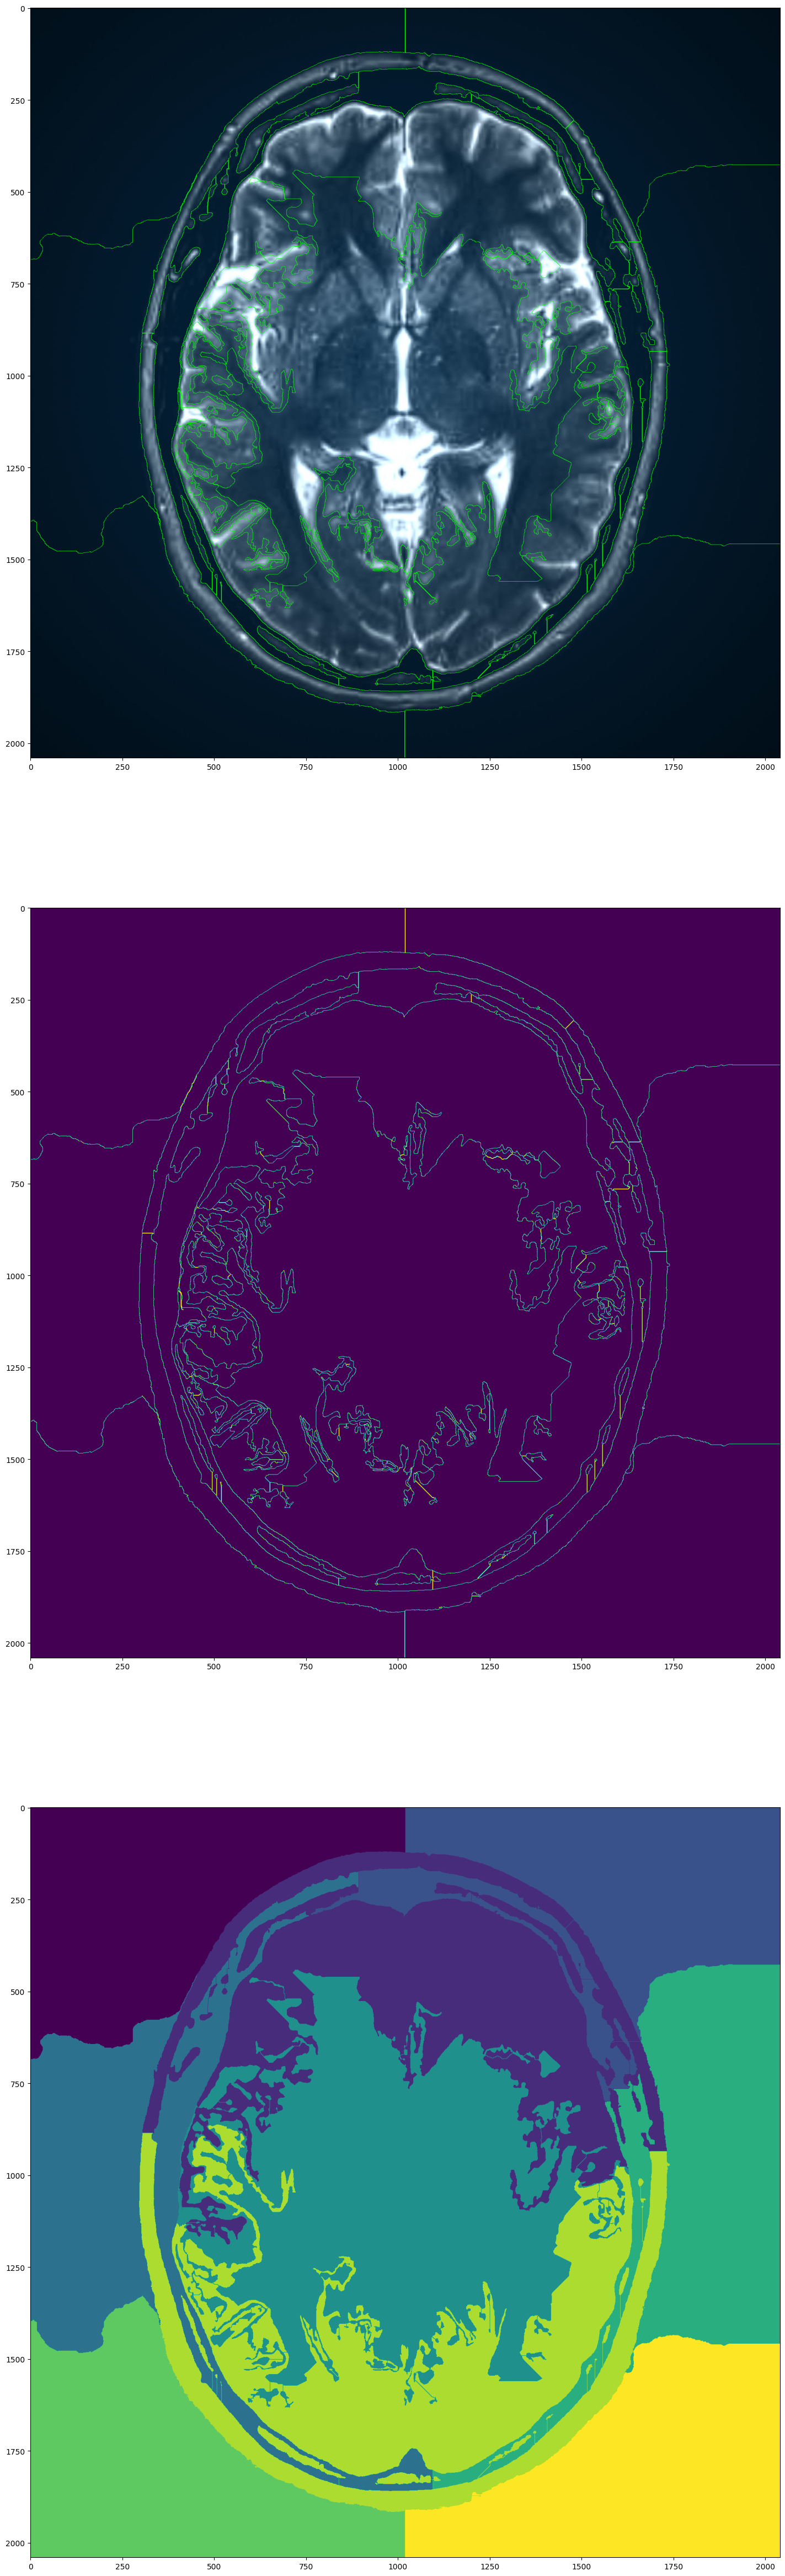

In [22]:
imgs = [cv2.cvtColor(result, cv2.COLOR_BGR2RGB), mask, labels]
fig = plt.figure(figsize=(60, 60))
for i, e in enumerate(imgs, 1):
    subplot = fig.add_subplot(3, 1, i)
    plt.imshow(e)

# Часть 2: Задача детекции объектов на изображении/видео
----

### Graph (Grab) Cut:
Как детекция так и сегментация, основан на графовых алгоритмах.

__Суть__:
* необходимо задать начальные приближения для пикселей фона и объекта;
* по этим приближениям оцениваются распределения цвета фона и картинки;
* зная эти распределения, можно получить вероятность принадлежности пикселя фону или картинке

__Алгоритм__:
1. строится граф с двумя вершинами: источник (фон) и сток (объект)
2. каждый пиксель изображения соединяется с источником и стоком
3. вес ребра пропорционален вероятности принадлежности пикселя фону и объекту, соответственно.
4. пикселы изображения разделяются на части алгоритмом [Minmium Cut](https://en.wikipedia.org/wiki/Minimum_cut)
5. алгоритм разрезает связный граф на две части таким образом, чтобы сумма весов ребер через которые проходит разрез была минимальна


![](./../src/imgs/graph_cut.png)

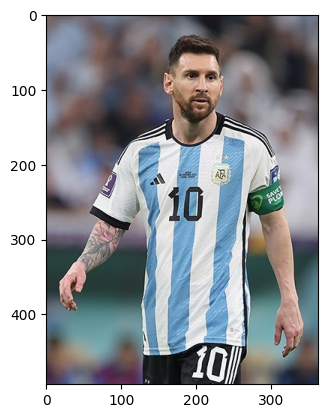

In [33]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./../data/messi.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

##### Рамкой выделяем область для оценки распределения значений пикселей объекта

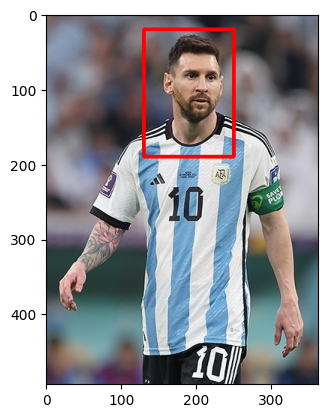

In [35]:
tmp = np.copy(img)
rect = (130,20, 250,190)
x1, y1, x2, y2 = rect
tmp = cv2.rectangle(tmp, (x1,y1), (x2,y2),  (0,0,255), 3)

plt.imshow(cv2.cvtColor(tmp, cv2.COLOR_BGR2RGB))

##### Запускаем алгоритм GraphCut (GrabCut):

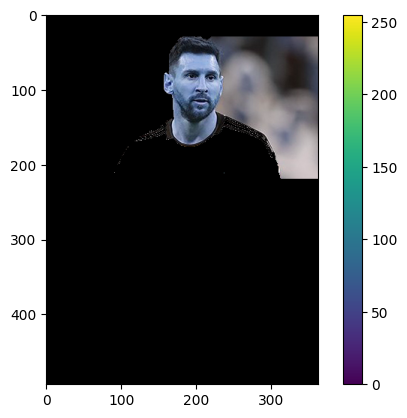

In [36]:
mask = np.zeros(img.shape[:2],np.uint8)

# выделяем память необходимую для работы алгоритма
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)


# прямоугльником задаем область принадлежащую объекту которую определили выше
rect = (30,30,350,190)

cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

# фильтруем
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

plt.imshow(img)
plt.colorbar()
plt.show()

In [37]:
mask_ = mask2.copy()

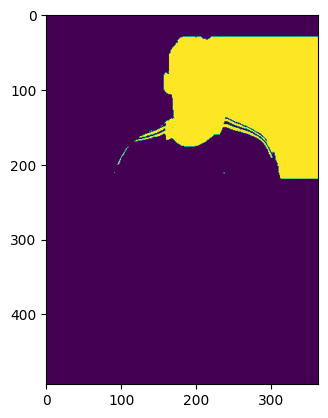

In [38]:
plt.imshow(mask_)


### Детектор лиц на изображении:
----

#### Постановка задачи:

- Детекция:
    * поиск объекта на изображении
    * в результате получаем область на изображении с соответствующим объектом
    * в некоторых случаях выдается оценка вероятность детекции

- Детектор по деталям:
    * отдельно детектируем части лица (глаза, нос, рот, уши и тд)
    * объединяем части в результате детекции

- Детектор лица в целом:
    * сканирующим окном проходим по изображению
    * оцениваем похожесть на лицо каждую часть изображения
    * есть ограничение на допустимый размер окна


#### Подготовка данных:
- подготавливаем положительные и отрицательные примеры изображений
- как правило положительных примеров больше, чем отрицательных
- для баланса выборки можно применить аугментацию изображений


#### Аугментация изображения:
- масштабирование
- поворот
- сдвиг
- зеркальное отображение
- вычитание градиента
- выравнивание гистограммы интенсивности

#### Обучение:
- PCA + Кластеризация;
- Нейросеть;
- Бустинг (Viola, Jones)


#### Кластеризация + PCA:
----

− снижаем размерность изображения с помощью PCA преобразования;
− кластеризуем изображения в каждой группе на 6 кластеров;
− в результате получается 12 центроидов;
− расстояние от изображения до центроида используем в качестве фактора для обучения;
− обучаем модель SVM, RandomForest, Neural Network.

[Probabilistic Visual Learning for Object Detection](https://pdfs.semanticscholar.org/5c93/4806032cd5fd8845fa172588d807037f6710.pdf)

![](./../src/imgs/pca_clustering.png)

#### Нейронная сеть - вариант CNN:
----

![](./../src/imgs/cnn_nn.png)

#### Бустинг (Viola, JoneS):
----

- детектор Viola и Jones
- можно обучить на абсолютно произвольные объекты
- основан на Adaboost
- [использование бустинга в задачах компьютерного зрения](https://wearables.cc.gatech.edu/paper_of_week/viola01rapid.pdf)

![](./../src/imgs/viola_jones.png)

$h_x$ - финальный классификатор
$m$ - число классификаторов в ансамбле
$h_j(x)$ - базовый классификатор
$\alpha_j$ - вес базоваого классификатора в ансамбле
$a_j$ - решение принимается в случае если значение фактора $f$ меньше порога $\theta$
$b_j$ - принимается в противном случае

![](./../src/imgs/viola_jones_system.png)


Важные особенности шагов:
- при инициализации присваиваем всем объектам в выборке одинаковый вес
- на очередном шаге j среди множества простых классификаторов выбираем тот, который дает наибольший прирост качества
- вычисляем коэффициент alpha пропорциональный приросту качества с учетом весов объектов
- увеличиваем вес объектов, которые остаются классифицированы неверно

Ограничения, плюсы и минусы:
1. ориентировочное число простых моделей в ансамбле ~3000
2. поиска скользящим окном по изображению большим ансамблем может занимать слишком много времени
3. на практике строят каскады ансамблей меньшего размера
4. область классифицируется очередным ансамблем в каскаде (haarcascade), только если предыдущий ансамбль классифицировал область как положительную

![](./../src/imgs/haarcascade.png)

Бустинг (Viola, Jones):
- [Предобученные модели](https://github.com/opencv/opencv/tree/master/data/haarcascades)
- [opencv предоставляет утилиты для подготовки данных обучения детектора](http://docs.opencv.org/trunk/dc/d88/tutorial_traincascade.html)
- алгоритм сравнительно быстро вычисляет детекции;
- но медленно обучается, так как на каждом шаге необходимо перебрать большое число вариантов простых классификаторов

##### Загружаем предобученные модели для детекции лиц и глаз

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# https://github.com/opencv/opencv/tree/master/data/haarcascades
face_cascade = cv2.CascadeClassifier('./../data/haars/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./../data/haars/haarcascade_eye.xml')

##### Загружаем изображение для детекции

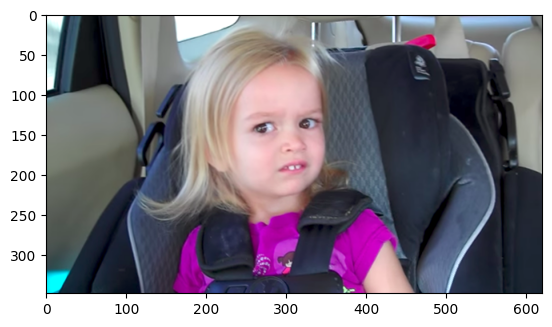

In [44]:
img = cv2.imread('./../data/penny.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

###### Применяем детектор

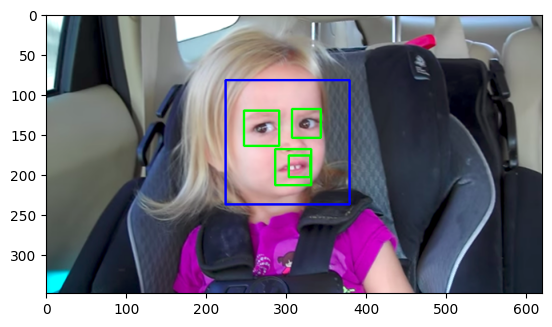

In [45]:
# преобразуем изображение в чернобелый формат
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# запускаем детектор лиц
faces = face_cascade.detectMultiScale(gray, 1.3, 3)

detections = np.copy(img)  # создаем копию изображения для визуализации результатов

for (x,y,w,h) in faces:
    # отрисовываем детекцию лиц
    cv2.rectangle(detections,(x,y),(x+w,y+h),(255,0,0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = detections[y:y+h, x:x+w]
    # запускаем детектор глаз для каждой детекции лица
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        # отрисовываем детекцию глаз
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.imshow(cv2.cvtColor(detections, cv2.COLOR_BGR2RGB))

### Трекинг Объектов на видеопотоке:
----

__Постановка задачи__:
1. Отслеживание перемещения объекта в кадре
2. Предсказание направления перемещения
3. Сообщение в случае потери объекта

__Сложности__:
1. несколько объектов на кадре
2. частичное или полное перекрытие другими объектами
3. реидентификация после временной потери из зоны видимости
4. объект может изменять внешний вид во время наблюдения (повороты, масштаб)


__Детекция и трекинг__:
- как правило, детекция сложнее чем трекинг;
- трекинг использует информацию из предыдущих кадров;
- трекер может накапливать ошибку;
- детектор ищет объект на изображении без учета предыдущих кадров;
- на практике алгоритм детекции запускается реже чем трекинг

__Обзор подходов__:
1. оптический поток (Kanade-Lucas-Tomashi) - трекинг характерных точек между кадрами
2. калмановский фильтр - использует априорную информацию о возможных перемещениях объекта для предсказания позиции в будущем
3. трекинг отдельного объекта - детектируем объект на первом кадре, затем отслеживаем его перемещение с помощью трекера
4. трекинг нескольких объектов- детектор для каждого кадра детектор выдает предсказания, задача трекера - поставить в соответствие детекции между кадрами


__Алгоритмы трекинга в OpenCV__:
- для использования трекеров в opencv необходимо установить пакет [opencv-contrib-python](https://pypi.python.org/pypi/opencv-contrib-python)
- трекеру необходимо хранить состояние между вызовами
- состояние хранится в объекте трекера
- создать объект трекера можно с помощью функции cv2.Tracker<алгоритм_трекинга>_create()


__Boosting Tracker__:
- основан на онлайн версии алгоритма AdaBoost
- детекция является положительным примером для обучения
- область вокруг детекции — отрицательные примеры
- для определения объекта на очередном фрейме запускается поиск в окрестности предыдущей детекции
- качество работы среднее

![](./../src/imgs/boosting_tracker.png)

##### __MIL — Multiple Instance Learning__:
− решение аналогично Boosting Tracker
− в отличие от Boosting Tracker семплируется несколько примеров вокруг вокруг детекции;
− полученные семплы объединяются в группу
− задача классификатора предсказать класс группы
− решение аналогично Boosting Tracker
− в отличие от Boosting Tracker семплируется несколько примеров вокруг вокруг детекции;
− полученные семплы объединяются в группу
− задача классификатора предсказать класс группы

![](./../src/imgs/MLE.png)


##### __KCF — Kernelized Correlation Filters__:
− идея семплирования положительных примеров, аналогичная MIL;
− используется факт перекрытия положительных семплов;
− скорость работы и качество выше, чем у Boosting Tracker и MIL;
− не устойчив к потере объекта из зоны видимости

[High-Speed Tracking with Kernelized Correlation Filters](https://arxiv.org/pdf/1404.7584.pdf)

# Пример работы трекера лица по видео с веб-камеры

для корректной работы примера необходимо установить пакет opencv-contrib:

```
pip install --upgrade opencv-python opencv-contrib-python

In [ ]:
import cv2

In [ ]:
face_cascade = cv2.CascadeClassifier('./../data/haars/haarcascade_frontalface_default.xml')

In [ ]:
camera = cv2.VideoCapture(0)

kcf_tracker = None  # объект трекера инициализируется при первой детекции лица

while(1):
    ret, frame = camera.read()
    # frame = cv2.bilateralFilter(frame, 5, 50, 100)
    frame = cv2.flip(frame, 1)

    kcf_tracker_box = None  # результат работы трекера

    if kcf_tracker is not None:
        # обновляем трекер и получаем результат трекинга
        ok, box = kcf_tracker.update(frame)
        # сохраняем результат трекинга
        if ok:
            kcf_tracker_box = box

    # преобразуем изображение в чернобелый формат
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # запускаем детектор лиц
    faces = face_cascade.detectMultiScale(gray, 1.3, 3)

    # инициализируем трекер первой детекцией
    if len(faces) != 0 and kcf_tracker is None:
        kcf_tracker = cv2.TrackerKCF_create()
        (x, y, w, h) = faces[0]
        kcf_tracker.init(frame, (x,y,w,h))

    for (x,y,w,h) in faces:
        # отрисовываем детекцию лиц
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0), 2)

    # отрисовываем результат трекера
    if kcf_tracker_box is not None:
        (x, y, w, h) = map(int, kcf_tracker_box)
        cv2.rectangle(frame, (x,y),(x+w,y+h), (0, 0, 255), 2)

    cv2.imshow('Tracking example', frame)
    interrupt=cv2.waitKey(10)

    # выход по нажатию на клавишу 'q'
    if  interrupt & 0xFF == ord('q'):
        break

camera.release()
cv2.destroyAllWindows()

# Полезные материалы:
----
1. [Computer Vision: Algorithms and Applications - 5](http://szeliski.org/Book/)
2. [Computer Vision: Algorithms and Applications - 14](http://szeliski.org/Book/)
3. [Image Segmentation](https://en.wikipedia.org/wiki/Image_segmentation)
4. [Visual Tracking](http://crcv.ucf.edu/papers/Tracking_Survey.pdf )
5. [Yolo Real Time Object Detection](https://pjreddie.com/darknet/yolo/)
6. [Yolo OpenCV](https://towardsdatascience.com/yolo-object-detection-with-opencv-and-python-21e50ac599e9?gi=7c7a4659b3f)
7. [Object Tracking](https://habr.com/ru/post/514450/)
8. [Real Time Gesture Recognition TensorFlow](https://techvidvan.com/tutorials/hand-gesture-recognition-tensorflow-opencv/)